# Kapitel: Grafikfunktionen

### Funktion: plot_bar_chart

Die Funktion `plot_bar_chart` erstellt ein anpassbares Balkendiagramm zur Visualisierung von Daten, wie zum Beispiel der prozentualen Verspätungsstatistik für verschiedene Zugkategorien. Sie ermöglicht eine flexible Anpassung des Diagrammtitels, der Achsenbeschriftungen und der Balkenfarben. Die Funktion kann auch optional Einträge mit einem Wert von 0 aus dem Diagramm ausschließen.

#### Parameter:
- **data (pd.DataFrame)**: Ein DataFrame, das die darzustellenden Daten enthält. Die Daten sollten mindestens zwei Spalten für die x- und y-Werte des Diagramms umfassen.
- **x_column (str, optional)**: Der Name der Spalte im DataFrame, die die Kategorien für die x-Achse enthält. Falls kein Wert angegeben wird, wird standardmäßig `'X'` verwendet.
- **y_column (str, optional)**: Der Name der Spalte im DataFrame, die die Werte für die y-Achse enthält. Falls kein Wert angegeben wird, wird standardmäßig `'Y'` verwendet.
- **title (str)**: Der Titel des Diagramms, der oben angezeigt wird.
- **x_axis_label (str)**: Die Bezeichnung der x-Achse.
- **y_axis_label (str)**: Die Bezeichnung der y-Achse.
- **bar_color (str)**: Die Farbe der Balken, die angezeigt werden soll (z. B. `'skyblue'`).
- **exclude_zeros (bool)**: Ein boolescher Wert, der festlegt, ob Einträge mit einem y-Wert von 0 aus dem Diagramm ausgeschlossen werden sollen. Standardmäßig ist dieser Wert `False`.

#### Rückgabewert:
Die Funktion gibt keinen Rückgabewert zurück, sondern zeigt das Balkendiagramm an.

#### Funktionsweise:
1. Überprüft, ob Spaltennamen für die x- und y-Werte übergeben wurden, und verwendet andernfalls die Standardwerte `'X'` und `'Y'`.
2. Filtert die Daten bei Bedarf, um Einträge mit einem y-Wert von 0 auszuschließen (wenn `exclude_zeros=True`).
3. Erstellt ein Balkendiagramm mit den Kategorien auf der x-Achse und den entsprechenden Werten auf der y-Achse.
4. Zeigt die Werte oberhalb jedes Balkens an und positioniert sie in einem Abstand von 3 % des maximalen y-Wertes über den Balken, um die Ablesbarkeit zu verbessern.
5. Setzt die y-Achse 10 % höher als den maximalen y-Wert, damit alle Beschriftungen vollständig sichtbar sind.


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart(data, x_column=None, y_column=None, title='', x_axis_label='', y_axis_label='', 
                   bar_color='skyblue', y_limit_factor=1.1, text_offset_factor=0.03, 
                   show_values=True, exclude_zeros=True):
    """
    Diese Funktion erstellt ein Balkendiagramm mit anpassbaren Parametern wie Titel, Achsenbezeichner, Farben und Y-Achsen-Limit.
    
    Parameters:
    - data: DataFrame oder Dictionary mit den Daten für das Diagramm.
    - x_column: Name der Spalte für die x-Achse (Kategorien). Standardwert: 'X', falls nicht angegeben.
    - y_column: Name der Spalte für die y-Achse (Werte). Standardwert: 'Y', falls nicht angegeben.
    - title: Titel des Diagramms.
    - x_axis_label: Bezeichnung der x-Achse.
    - y_axis_label: Bezeichnung der y-Achse.
    - bar_color: Farbe der Balken (Standard: 'skyblue').
    - y_limit_factor: Faktor für die Y-Achsen-Limit (Standard: 1.1, um 10% oberhalb des Maximalwerts zu setzen).
    - text_offset_factor: Faktor zur Berechnung des Abstands für die Textanzeige (Standard: 3% über dem Balken).
    - show_values: Boolean, ob die Werte über den Balken angezeigt werden sollen (Standard: True).
    - exclude_zeros: Boolean, ob 0-Werte im Diagramm ausgeschlossen werden sollen (Standard: True).
    """
    
    # Setze Standardwerte für x_column und y_column, wenn sie nicht angegeben wurden
    if x_column is None:
        x_column = 'X'
    if y_column is None:
        y_column = 'Y'
    
    # Überprüfen, ob die erforderlichen Spalten vorhanden sind
    if not all(col in data.columns for col in [x_column, y_column]):
        raise ValueError(f"Die Eingabedaten müssen die Spalten '{x_column}' und '{y_column}' enthalten.")
    
    # Falls exclude_zeros True ist, alle Zeilen mit 0 im y_column entfernen
    if exclude_zeros:
        data = data[data[y_column] > 0]
    
    # Maximalwert berechnen und mit y_limit_factor multiplizieren
    y_limit = max(data[y_column]) * y_limit_factor
    
    # Balkendiagramm erstellen
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=x_column, y=y_column, data=data, color=bar_color)
    
    # Titel und Achsenbeschriftungen
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    
    # Berechnung des Textversatzes basierend auf dem höchsten Wert
    max_value = max(data[y_column])
    text_offset = max_value * text_offset_factor  # 3% des maximalen Werts
    
    # Werte über den Balken anzeigen, wenn show_values True ist
    if show_values:
        for bar in ax.patches:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + text_offset, f"{yval:.1f}", ha='center', va='bottom')

    # Y-Achse auf y_limit setzen
    plt.ylim(0, y_limit)
    
    plt.show()

# Kapitel: Berechne Anzeigewerte

### Funktion: calculate_average_min_delay

Die `calculate_average_min_delay`-Funktion berechnet die durchschnittliche Verspätung pro Zugart aus einer CSV-Datei, die Verspätungsdaten enthält.

#### Parameter:
- **file_path**: Der Pfad zur CSV-Datei, die die Daten zur Verspätung enthält. Die Datei sollte zwei Spalten haben: `'Zugart'` und `'Verspätung in Minuten'`.
- **include_zero_delay** *(optional)*: Ein boolescher Parameter, der festlegt, ob Zugarten, deren durchschnittliche Verspätung Null Minuten beträgt, in die Berechnung einbezogen werden sollen. Wenn `True`, werden auch Einträge mit `0` Minuten Verspätung berücksichtigt. Standardwert ist `True`.

#### Rückgabewert:
Die Funktion gibt ein DataFrame mit zwei Spalten zurück:
- **Zugart**: Die Art des Zuges (z.B. ICE, RE).
- **Durchschnittliche Verspätung (Minuten)**: Die durchschnittliche Verspätung der jeweiligen Zugart in Minuten.

#### Funktionsweise:
1. Prüft, ob die Datei existiert. Falls nicht, wird ein `FileNotFoundError` ausgelöst.
2. Liest die CSV-Datei ohne Header ein und benennt die Spalten in `'Zugart'` und `'Verspätung in Minuten'`.
3. Berechnet die durchschnittliche Verspätung pro Zugart für Einträge mit mehr als 0 Minuten Verspätung.
4. Ergänzt die Anzahl der Vorkommen jeder Zugart und füllt fehlende Durchschnittswerte mit `0`.
5. Falls `include_zero_delay` auf `False` gesetzt ist, werden Zugarten mit einer durchschnittlichen Verspätung von `0` aus dem Ergebnis entfernt.


In [136]:
import pandas as pd
import os

def calculate_average_min_delay(file_path):
    # Überprüfen, ob der Dateipfad gültig ist
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Die Datei wurde nicht gefunden: {file_path}")
    
    # CSV-Datei einlesen, ohne Header
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung in Minuten'])
    
    # Durchschnittliche Verspätung pro Zugart berechnen (nur für Verspätungen > 0)
    avg_delay = df[df['Verspätung in Minuten'] > 0].groupby('Zugart')['Verspätung in Minuten'].mean().reset_index()
    
    # Spaltennamen anpassen
    avg_delay.columns = ['Zugart', 'Durchschnittliche Verspätung (Minuten)']
    
    # Alle Zugarten im ursprünglichen DataFrame beibehalten
    all_delays = df.groupby('Zugart')['Verspätung in Minuten'].count().reset_index()
    all_delays.columns = ['Zugart', 'Anzahl']

    # Zusammenführen der Durchschnittswerte mit der Anzahl
    result = pd.merge(all_delays, avg_delay, on='Zugart', how='left')

    # Füllen der fehlenden Durchschnittswerte mit 0
    result['Durchschnittliche Verspätung (Minuten)'] = result['Durchschnittliche Verspätung (Minuten)'].fillna(0)

    return result[['Zugart', 'Durchschnittliche Verspätung (Minuten)']]

### Funktion: calculate_average_percentage_delay

Die `calculate_average_percentage_delay`-Funktion berechnet den prozentualen Anteil verspäteter Züge pro Zugart aus einer CSV-Datei, die Verspätungsdaten enthält.

#### Parameter:
- **file_path**: Der Pfad zur CSV-Datei, die die Daten zur Verspätung enthält. Die Datei sollte zwei Spalten haben: `'Zugart'` und `'Verspätung (Minuten)'`, wobei die erste Zeile keinen Header enthält.
  
#### Rückgabewert:
Die Funktion gibt ein DataFrame mit zwei Spalten zurück:
- **Zugart**: Die Art des Zuges (z.B. ICE, IC, RE, S-Bahn).
- **Verspätet (%)**: Der prozentuale Anteil der verspäteten Züge der jeweiligen Zugart, basierend auf den Einträgen mit mehr als 0 Minuten Verspätung.

#### Funktionsweise:
1. Prüft, ob die Datei existiert. Falls nicht, wird ein `FileNotFoundError` ausgelöst.
2. Liest die CSV-Datei ohne Header ein und benennt die Spalten in `'Zugart'` und `'Verspätung (Minuten)'`.
3. Berechnet die Anzahl der verspäteten Züge und die Gesamtanzahl der Züge pro Zugart.
4. Ermittelt den prozentualen Anteil verspäteter Züge für jede Zugart.
5. Gibt ein DataFrame mit den Zugarten und dem entsprechenden Verspätungsanteil zurück.


In [137]:
import pandas as pd

def calculate_average_percentage_delay(file_path):
    # CSV-Datei einlesen ohne Header
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung (Minuten)'])
    
    # Zähle die Gesamtzahl der Züge pro Zugart und die Anzahl der verspäteten Züge
    total_counts = df['Zugart'].value_counts()
    delayed_counts = df[df['Verspätung (Minuten)'] > 0]['Zugart'].value_counts()
    
    # Berechnung des prozentualen Anteils verspäteter Züge
    delay_percentage = (delayed_counts / total_counts * 100).fillna(0).reset_index()
    delay_percentage.columns = ['Zugart', 'Verspätet (%)']
    
    return delay_percentage

### Funktion: delay_statistics_by_train_type

Die Funktion `delay_statistics_by_train_type` berechnet die prozentuale Verspätungsstatistik für eine spezifische Zugart in verschiedenen Zeitkategorien.

#### Parameter:
- **file_path (str)**: Der Pfad zur CSV-Datei, die die Verspätungsdaten enthält. Die Datei sollte die Spalten `'Zugart'` und `'Verspätung in Minuten'` enthalten.
- **train_type (str)**: Das Kürzel der Zugart, für die die Verspätungsstatistik berechnet werden soll (z. B. `'ICE'`).

#### Rückgabewert:
Die Funktion gibt ein Dictionary mit den Verspätungskategorien und den jeweiligen prozentualen Anteilen zurück. Wenn die Zugart nicht vorhanden ist oder keine verspäteten Einträge existieren, wird eine entsprechende Meldung ausgegeben.

#### Funktionsweise:
1. Überprüft, ob die Datei existiert und liest die CSV-Daten ein.
2. Filtert die Daten, um nur die Einträge der gewählten Zugart zu behalten.
3. Prüft, ob es verspätete Züge dieser Zugart gibt:
4. Falls keine Einträge oder keine Verspätungen vorhanden sind, wird eine Meldung zurückgegeben.
5. Berechnet die prozentualen Anteile verspäteter Züge in den Kategorien < 10 min, < 30 min, < 60 min, < 120 min und > 120 min.
6. Gibt das Dictionary mit den Verspätungskategorien und den zugehörigen Prozentwerten zurück.

In [138]:
import pandas as pd

def delay_statistics_by_train_type(file_path, train_type):
    # CSV-Datei einlesen
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung (Minuten)'])
    
    # Filtere die Daten für die angegebene Zugart
    df_filtered = df[df['Zugart'] == train_type]
    
    # Überprüfen, ob die Zugart vorhanden ist
    if df_filtered.empty:
        print(f"Zugart '{train_type}' ist in den Daten nicht vorhanden.")
        return None

    # Filtere auf verspätete Züge (> 0 Minuten)
    df_delayed = df_filtered[df_filtered['Verspätung (Minuten)'] > 0]
    
    # Überprüfen, ob die Zugart überhaupt Verspätungen hat
    if df_delayed.empty:
        print(f"Zugart '{train_type}' weist keine verspäteten Züge auf.")
        return None

    # Gesamtanzahl der verspäteten Züge der angegebenen Zugart
    total_delays = len(df_delayed)
    
    # Berechnung des prozentualen Anteils in jeder Kategorie
    delay_stats = {
        '< 10 min': (df_delayed['Verspätung (Minuten)'] < 10).sum() / total_delays * 100,
        '< 30 min': ((df_delayed['Verspätung (Minuten)'] >= 10) & (df_delayed['Verspätung (Minuten)'] < 30)).sum() / total_delays * 100,
        '< 60 min': ((df_delayed['Verspätung (Minuten)'] >= 30) & (df_delayed['Verspätung (Minuten)'] < 60)).sum() / total_delays * 100,
        '< 120 min': ((df_delayed['Verspätung (Minuten)'] >= 60) & (df_delayed['Verspätung (Minuten)'] < 120)).sum() / total_delays * 100,
        '> 120 min': (df_delayed['Verspätung (Minuten)'] >= 120).sum() / total_delays * 100
    }
    
    return delay_stats

# Tests

In [139]:
import pandas as pd

def load_csv_as_data(file_path):
    """
    Lädt eine CSV-Datei und gibt sie als DataFrame zurück.
    Die relevanten Spaltennamen werden generalisiert:
      - 'plannedArrival' oder 'plannedDeparture' -> 'planned'
      - 'changedArrivalTime' oder 'changedDepartureTime' -> 'changed'
      - 'arrival_delay' oder 'departure_delay' -> 'delay'
    Zusätzlich werden alle negativen 'delay'-Werte auf 0 gesetzt.

    :param file_path: Der Pfad zur CSV-Datei, die geladen werden soll.
    :return: DataFrame mit generalisierten Spaltennamen und angepassten Werten.
    """
    try:
        # CSV-Datei einlesen, unter der Annahme, dass die Spalten durch Semikolon getrennt sind
        df = pd.read_csv(file_path, sep=";", header=0)
        
        # Spaltenumbenennung basierend auf gemeinsamer Bedeutung
        rename_mapping = {
            'plannedArrival': 'planned',
            'plannedDeparture': 'planned',
            'changedArrivalTime': 'changed',
            'changedDepartureTime': 'changed',
            'arrival_delay': 'delay',
            'departure_delay': 'delay'
        }
        
        # Nur Spalten umbenennen, die tatsächlich in der CSV vorhanden sind
        df.rename(columns={col: rename_mapping[col] for col in df.columns if col in rename_mapping}, inplace=True)
        
        # Falls die generalisierte Spalte 'delay' existiert, negative Werte auf 0 setzen
        if 'delay' in df.columns:
            df['delay'] = df['delay'].apply(lambda x: max(x, 0))
    
    except FileNotFoundError:
        raise ValueError(f"Die Datei unter dem Pfad {file_path} wurde nicht gefunden.")
    except pd.errors.EmptyDataError:
        raise ValueError("Die CSV-Datei ist leer.")
    except Exception as e:
        raise ValueError(f"Fehler beim Einlesen der Datei: {e}")
    
    return df


In [140]:
import pandas as pd

def filter_data(data, eva=None, date=None, week_number=None):
    """
    Filtert die Daten basierend auf den gegebenen Parametern.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param eva: Die EVN-Nummer des Bahnhofs, nach dem gefiltert werden soll (Optional).
    :param mode: Modus für die Verspätungsberechnung, entweder 'min' oder '%'.
    :param date: Das Datum, nach dem gefiltert werden soll (Optional, im Format 'YYYY-MM-DD').
    :param week_number: Die Kalenderwoche, nach der gefiltert werden soll (Optional).
    :param delay_threshold: Verspätung, ab der Züge berücksichtigt werden sollen (Optional).
    :return: Gefilterte Daten, die an die jeweilige Berechnungsfunktion übergeben werden können.
    """
    
    # Überprüfen, ob die Daten vorhanden sind
    if data.empty:
        print("Es sind keine Daten vorhanden.")
        return None
    
    # Stelle sicher, dass die EVA-Spalte als String behandelt wird
    data['eva'] = data['eva'].astype(str)
    
    # Wenn eva nicht spezifiziert, berücksichtige alle
    if eva is not None:
        if eva not in data['eva'].values:
            print(f"Es gibt keinen Bahnhof mit der EVA {eva}.")
            return None
        data = data[data['eva'] == eva]
    
    # Wenn ein Datum angegeben ist, nach Jahr, Monat und Tag filtern
    if date:
        data['date'] = pd.to_datetime(data['planned']).dt.date
        data = data[data['date'] == pd.to_datetime(date).date()]
    
    # Wenn eine Kalenderwoche angegeben ist, nach dieser filtern
    if week_number:
        if date:
            print("Tag und Kalenderwoche können nicht gleichzeitig ausgewählt werden.")
            return None
        data['week_number'] = pd.to_datetime(data['planned']).dt.isocalendar().week
        data = data[data['week_number'] == week_number]
    
    return data

In [141]:
def calculate_average_min_delay(data, delay_threshold=0):
    """
    Berechnet die durchschnittliche Verspätung in Minuten pro Zugart.
    
    Es werden nur Züge berücksichtigt, deren Verspätung größer ist als der übergebene Schwellenwert.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Minimaler Schwellenwert für die Verspätung (in Minuten), um in die Berechnung einbezogen zu werden.
    :return: DataFrame mit den Spalten 'X' (Zugart) und 'Y' (Durchschnittliche Verspätung in Minuten).
    """
    if data.empty:
        print("Keine Daten für die Berechnung der Verspätung vorhanden.")
        return None

    # Nur Züge mit einer Verspätung größer als der Schwellenwert berücksichtigen
    delayed_data = data[data['delay'] > delay_threshold]
    
    if delayed_data.empty:
        print(f"Keine Züge mit einer Verspätung größer als {delay_threshold} Minuten gefunden.")
        return None
    
    # Durchschnittliche Verspätung pro Zugart berechnen
    avg_delay_by_category = delayed_data.groupby('trainCategory')['delay'].mean()
    
    # Ergebnis in einen DataFrame umwandeln
    result = avg_delay_by_category.reset_index(name='Y')
    result['X'] = result['trainCategory']
    
    # Ergebnis formatieren und zurückgeben
    result = result[['X', 'Y']]
    result['Y'] = result['Y'].round(2)
    
    return result


In [142]:
def calculate_percentage_delay(data, delay_threshold):
    """
    Berechnet den Prozentsatz der verspäteten Züge je Zugart.
    Falls 'Y' NaN-Werte enthält, werden diese durch 0 ersetzt.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Schwellenwert für die Verspätung in Minuten.
    :return: DataFrame mit der Zugkategorie und dem Prozentsatz der verspäteten Züge.
    """
    # Züge filtern, die mehr als 'delay_threshold' Minuten Verspätung haben
    delayed_trains = data[data['delay'] > delay_threshold]
    
    # Züge nach Zugart gruppieren
    total_trains_by_category = data.groupby('trainCategory').size()
    delayed_trains_by_category = delayed_trains.groupby('trainCategory').size()
    
    # Berechnung des Prozentsatzes der verspäteten Züge pro Zugart
    percentage_delay = (delayed_trains_by_category / total_trains_by_category) * 100
    
    # Ergebnis in DataFrame umwandeln
    result = percentage_delay.reset_index(name='Y')
    result['X'] = result['trainCategory']
    
    # Die Spalten umbenennen und das Format runden
    result = result[['X', 'Y']]
    result['Y'] = result['Y'].fillna(0).round(2)  # NaN durch 0 ersetzen und runden
    
    return result

In [143]:
def calculate_delay_statistics_by_train_type(data, train_type):
    """
    Berechnet die Statistik der Verspätungen einer bestimmten Zugart aus einem DataFrame.
    
    :param data: DataFrame, das die Daten aus der CSV enthält.
    :param train_type: Die Zugart, für die die Statistik berechnet werden soll.
    :return: DataFrame mit den Verspätungskategorien (X) und deren prozentualem Anteil (Y).
    """
    # Filtere die Daten für die angegebene Zugart
    df_filtered = data[data['trainCategory'] == train_type]
    
    # Überprüfen, ob die Zugart vorhanden ist
    if df_filtered.empty:
        print(f"Zugart '{train_type}' ist in den Daten nicht vorhanden.")
        return None

    # Filtere auf Züge mit einer positiven Verspätung
    df_delayed = df_filtered[df_filtered['delay'] > 0]
    
    # Überprüfen, ob die Zugart überhaupt verspätete Züge hat
    if df_delayed.empty:
        print(f"Zugart '{train_type}' weist keine verspäteten Züge auf.")
        return None

    # Gesamtanzahl der verspäteten Züge der angegebenen Zugart
    total_delays = len(df_delayed)
    
    # Berechnung des prozentualen Anteils in jeder Kategorie
    delay_stats = {
        '< 10 min': (df_delayed['delay'] < 10).sum() / total_delays * 100,
        '< 30 min': ((df_delayed['delay'] >= 10) & (df_delayed['delay'] < 30)).sum() / total_delays * 100,
        '< 60 min': ((df_delayed['delay'] >= 30) & (df_delayed['delay'] < 60)).sum() / total_delays * 100,
        '< 120 min': ((df_delayed['delay'] >= 60) & (df_delayed['delay'] < 120)).sum() / total_delays * 100,
        '> 120 min': (df_delayed['delay'] >= 120).sum() / total_delays * 100
    }

    # Wandelt das Dictionary in ein DataFrame um
    stats_df = pd.DataFrame(list(delay_stats.items()), columns=['X', 'Y'])
    
    return stats_df


     X       Y
0  ECE   60.00
1   IC    0.00
2  ICE   72.07
3    N   93.33
4   NJ   50.00
5   RB  100.00
6   RE   78.72
7    S   83.61
8  TGV   61.11


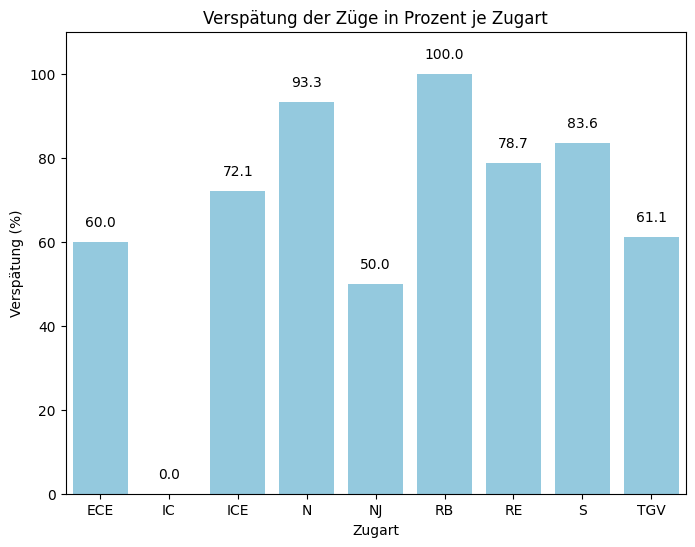

In [160]:
# Daten laden (z.B. aus CSV)
data = load_csv_as_data("sql/csv/ar-superquery.csv")
#data = load_csv_as_data("out/test-superquery.csv")

# Beispiel: Berechne Prozentsatz der verspäteten Züge für den Bahnhof mit EVA "8000105"
filtered_data = filter_data(data, eva="8000244")

result = calculate_percentage_delay(filtered_data, delay_threshold=0)
#result = calculate_average_min_delay(filtered_data)
#result = calculate_delay_statistics_by_train_type(data, "ICE")
if result is not None:
    print(result)
    plot_bar_chart(result, title="Verspätung der Züge in Prozent je Zugart", x_axis_label="Zugart", y_axis_label="Verspätung (%)", exclude_zeros=False)


# Test 2

In [167]:
def filter_data2(data, evas=None, date=None, week_number=None):
    """
    Filtert die Daten basierend auf den gegebenen Parametern.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param evas: Liste von EVA-Nummern der Bahnhöfe, nach denen gefiltert werden soll (Optional).
    :param date: Das Datum, nach dem gefiltert werden soll (Optional, im Format 'YYYY-MM-DD').
    :param week_number: Die Kalenderwoche, nach der gefiltert werden soll (Optional).
    :return: Gefilterte Daten, die an die jeweilige Berechnungsfunktion übergeben werden können.
    """
    
    # Überprüfen, ob die Daten vorhanden sind
    if data.empty:
        print("Es sind keine Daten vorhanden.")
        return None
    
    # Stelle sicher, dass die EVA-Spalte als String behandelt wird
    data['eva'] = data['eva'].astype(str)
    
    # Wenn evas nicht spezifiziert, berücksichtige alle
    if evas is not None:
        # Falls nur ein einzelner Wert übergeben wurde, konvertiere ihn in eine Liste
        if isinstance(evas, str):
            evas = [evas]
        
        # Falls die übergebenen EVAs nicht in den Daten sind, gib eine Warnung aus
        if not set(evas).issubset(data['eva'].values):
            print(f"Es gibt keine Bahnhöfe mit den EVA-Nummern {evas}.")
            return None
        # Filtere nach den angegebenen EVA-Nummern
        data = data[data['eva'].isin(evas)]
    
    # Wenn ein Datum angegeben ist, nach Jahr, Monat und Tag filtern
    if date:
        data['date'] = pd.to_datetime(data['planned']).dt.date
        data = data[data['date'] == pd.to_datetime(date).date()]
    
    # Wenn eine Kalenderwoche angegeben ist, nach dieser filtern
    if week_number:
        if date:
            print("Tag und Kalenderwoche können nicht gleichzeitig ausgewählt werden.")
            return None
        data['week_number'] = pd.to_datetime(data['planned']).dt.isocalendar().week
        data = data[data['week_number'] == week_number]
    
    return data


In [209]:
def calculate_percentage_delay_by_category_and_station(data, delay_threshold):
    """
    Berechnet den Prozentsatz der verspäteten Züge je Zugart und je Bahnhof sowie einen Durchschnittsbalken.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Schwellenwert für die Verspätung in Minuten.
    :return: DataFrame mit den Spalten: X (Zugkategorie), Y (Verspätungsprozentsatz) und station (Bahnhof).
    """
    # Züge filtern, die mehr als 'delay_threshold' Minuten Verspätung haben
    delayed_trains = data[data['delay'] > delay_threshold]
    
    # Berechnung: Gesamtanzahl Züge und verspätete Züge je Zugkategorie und Bahnhof
    total_trains = data.groupby(['trainCategory', 'station']).size()
    delayed_trains_by_category = delayed_trains.groupby(['trainCategory', 'station']).size()
    
    # Prozentsatz der verspäteten Züge je Zugkategorie und Bahnhof
    percentage_delay = (delayed_trains_by_category / total_trains) * 100
    
    # DataFrame mit den Ergebnissen
    result = percentage_delay.reset_index(name='delayPercentage')
    
    # Umbenennen der Spalten für das gewünschte Format
    result = result.rename(columns={'trainCategory': 'X', 'delayPercentage': 'Y'})
    
    # NaN-Werte durch 0 ersetzen und auf 2 Dezimalstellen runden
    result['Y'] = result['Y'].fillna(0).apply(lambda x: int(x * 100) / 100)  # NaN durch 0 ersetzen und abschneiden
    
    return result

In [255]:
def calculate_average_min_delay_by_category_and_station(data, delay_threshold=0):
    """
    Berechnet die durchschnittliche Verspätung in Minuten pro Zugart und Bahnhof.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Minimaler Schwellenwert für die Verspätung (in Minuten), um in die Berechnung einbezogen zu werden.
    :return: DataFrame mit den Spalten 'X' (Zugart), 'Y' (Durchschnittliche Verspätung in Minuten) und 'station' (Bahnhof).
    """
    if data.empty:
        print("Keine Daten für die Berechnung der Verspätung vorhanden.")
        return None

    # Nur Züge mit einer Verspätung größer als der Schwellenwert berücksichtigen
    delayed_data = data[data['delay'] > delay_threshold]
    
    if delayed_data.empty:
        print(f"Keine Züge mit einer Verspätung größer als {delay_threshold} Minuten gefunden.")
        return None
    
    # Durchschnittliche Verspätung pro Zugart und Bahnhof berechnen
    avg_delay_by_category_station = delayed_data.groupby(['trainCategory', 'station'])['delay'].mean().reset_index()
    
    # Ergebnis formatieren
    result = avg_delay_by_category_station[['trainCategory', 'station', 'delay']]
    result = result.rename(columns={'trainCategory': 'X', 'delay': 'Y'})

    # Runden der durchschnittlichen Verspätung
    result['Y'] = result['Y'].round(1)
    
    return result

In [254]:
def calculate_delay_statistics_by_train_type_and_station(data, train_type=None):
    """
    Berechnet die Statistik der Verspätungen für eine bestimmte Zugart oder für alle Züge,
    wenn keine Zugart angegeben ist, aus einem bereits gefilterten DataFrame.
    
    :param data: DataFrame, das die bereits gefilterten Daten enthält.
    :param train_type: Die Zugart, für die die Statistik berechnet werden soll. Wenn None, wird für alle Zugarten berechnet.
    :return: DataFrame mit den Verspätungskategorien (X) und deren prozentualem Anteil (Y) sowie der Stationen-Spalte.
    """
    # Wenn eine Zugart angegeben ist, nur diese berücksichtigen
    if train_type:
        data = data[data['trainCategory'] == train_type]
    
    # Überprüfen, ob es nach der Filterung noch Daten gibt
    if data.empty:
        print(f"Keine Daten für die Zugart '{train_type}' gefunden." if train_type else "Keine Daten gefunden.")
        return None
    
    # Filtere auf Züge mit einer positiven Verspätung
    df_delayed = data[data['delay'] > 0]
    
    # Überprüfen, ob es verspätete Züge gibt
    if df_delayed.empty:
        print(f"Es gibt keine verspäteten Züge.")
        return None

    # Gesamtanzahl der verspäteten Züge
    total_delays = len(df_delayed)
    
    # Berechnung des prozentualen Anteils in jeder Kategorie und nach Station
    delay_stats = []
    for station in df_delayed['station'].unique():  # Gruppiert nach Station
        station_data = df_delayed[df_delayed['station'] == station]
        
        stats = {
            'station': station,
            '< 10 min': (station_data['delay'] < 10).sum() / len(station_data) * 100,
            '< 30 min': ((station_data['delay'] >= 10) & (station_data['delay'] < 30)).sum() / len(station_data) * 100,
            '< 60 min': ((station_data['delay'] >= 30) & (station_data['delay'] < 60)).sum() / len(station_data) * 100,
            '< 120 min': ((station_data['delay'] >= 60) & (station_data['delay'] < 120)).sum() / len(station_data) * 100,
            '> 120 min': (station_data['delay'] >= 120).sum() / len(station_data) * 100
        }
        delay_stats.append(stats)

    # Umwandlung der Statistik in einen DataFrame
    stats_df = pd.DataFrame(delay_stats)
    
    # Reshape für die Darstellung der Kategorien in der Spalte 'X'
    stats_df = pd.melt(stats_df, id_vars=['station'], var_name='X', value_name='Y')

    # Optional: Y-Werte runden
    stats_df['Y'] = stats_df['Y'].apply(lambda x: round(x, 1))

    return stats_df


In [276]:
def plot_bar_chart_by_category_and_station(data, x_column='X', y_column='Y', 
                                           hue_column='station', title='', 
                                           x_axis_label='Zugkategorie', y_axis_label='Verspätungsprozentsatz', 
                                           palette='Set2', y_limit_factor=1.1, text_offset_factor=0.03, 
                                           show_values=True, fig_size_x=17, fig_size_y=8, int_value=True):
    """
    Erstellt ein Balkendiagramm, das für jede Zugart (x-Achse) Balken für jeden Bahnhof anzeigt.
    
    :param data: DataFrame mit den Daten für das Diagramm.
    :param x_column: Name der Spalte für die x-Achse (z. B. Zugkategorien).
    :param y_column: Name der Spalte für die y-Achse (z. B. Verspätungsprozentsatz).
    :param hue_column: Name der Spalte für die Farbcodierung (z. B. Bahnhöfe).
    :param title: Titel des Diagramms.
    :param x_axis_label: Bezeichnung der x-Achse.
    :param y_axis_label: Bezeichnung der y-Achse.
    :param palette: Farbpalette für die Balken (Standard: 'Set2').
    :param y_limit_factor: Faktor für die Y-Achsen-Limit (Standard: 1.1).
    :param text_offset_factor: Faktor zur Berechnung des Abstands für die Textanzeige (Standard: 0.03).
    :param show_values: Boolean, ob die Werte über den Balken angezeigt werden sollen (Standard: True).
    :param int_value: Boolean, ob die Zahlen über den Balken als int oder double angezeigt werden (Standardwert: True)
    """
    # Maximalwert für die Y-Achse berechnen
    y_limit = data[y_column].max() * y_limit_factor
    
    # Balkendiagramm erstellen
    plt.figure(figsize=(fig_size_x, fig_size_y))
    ax = sns.barplot(x=x_column, y=y_column, hue=hue_column, data=data, palette=palette)
    
    # Titel und Achsenbeschriftungen setzen
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    
    # Werte über den Balken anzeigen
    if show_values:
        for bar in ax.patches:
            yval = bar.get_height()
            if yval > 0:  # Nur Werte > 0 anzeigen
                if int_value:
                    yval = int(yval)  # Ganze Zahl, wenn int_value True
                else:
                    yval = round(yval, 1)  # Eine Nachkommastelle, wenn int_value False

                plt.text(
                    bar.get_x() + bar.get_width() / 2, 
                    yval + text_offset_factor, 
                    f"{yval}",  # Anzeige des Werts
                    ha='center', 
                    va='bottom'
                )


    
    # Y-Achse anpassen
    plt.ylim(0, y_limit)
    
    plt.legend(title='Bahnhof')
    plt.tight_layout()
    plt.show()

Kann für einezlene Bahnhöfe prozente wie viel verspätet oder für alle je nach zugart

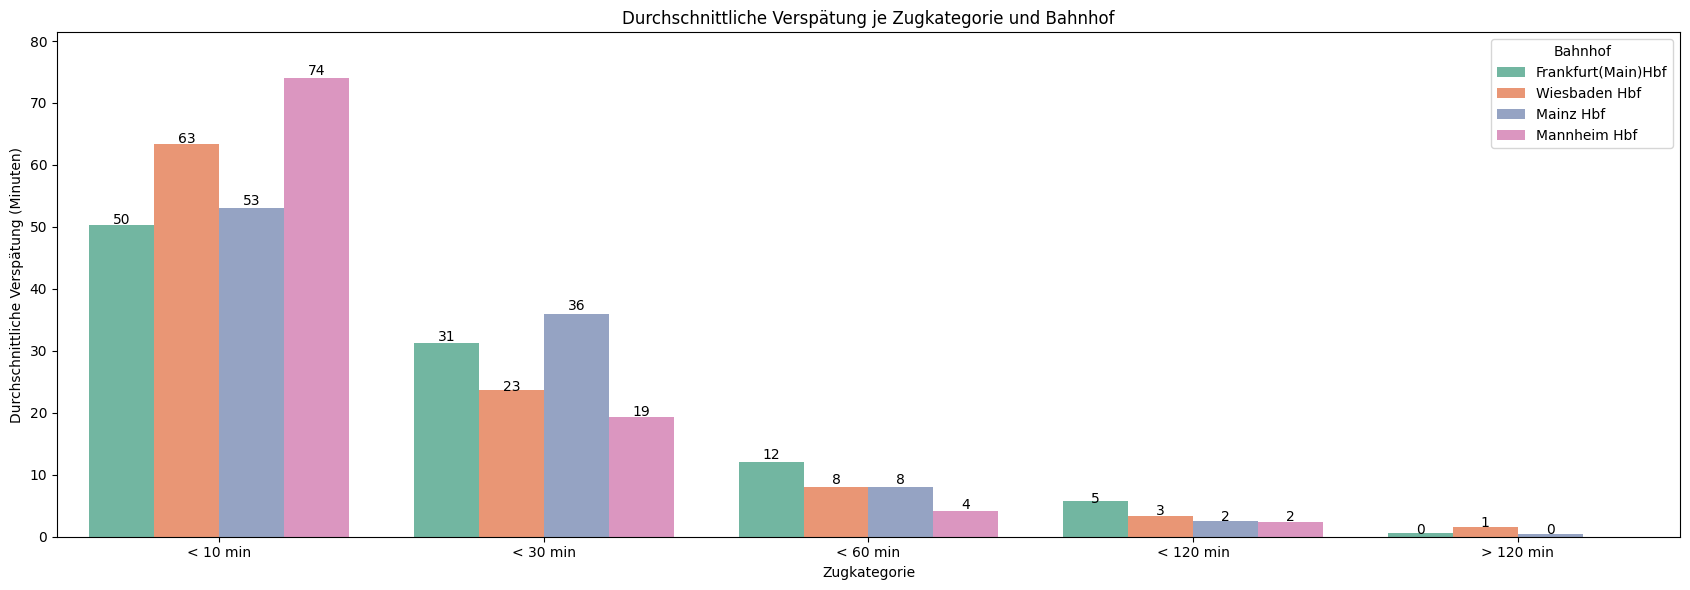

In [279]:
# 1. CSV-Daten laden
data = load_csv_as_data('sql/csv/ar-superquery.csv')

# 2. Daten filtern (optional)
filtered_data = filter_data2(
    data=data,
    evas=None,          # Bahnhof nach EVA-Nummer (Optional, None wenn nicht benötigt, z.B. 8000250 oder 8000134)
    date=None,         # Datum im Format 'YYYY-MM-DD' (Optional, None wenn nicht benötigt)
    week_number=None   # Kalenderwoche (Optional, None wenn nicht benötigt)
)

delay_threshold = 5
# 3. Durchschnittliche Verspätung in Minuten nach Zugart und Bahnhof berechnen
average_min_delay_data = calculate_average_min_delay_by_category_and_station(
    data=filtered_data,
    delay_threshold=delay_threshold  # Schwellenwert in Minuten
)

# 3. Prozentuale Verspätungen nach Zugart und Bahnhof berechnen
percentage_delay_data = calculate_percentage_delay_by_category_and_station(
    data=filtered_data,
    delay_threshold=delay_threshold  # Schwellenwert in Minuten
)

# 3. Verspätungsstatistik für eine Zugart berechnen
train_delay_data = calculate_delay_statistics_by_train_type_and_station(
    data=filtered_data,
    train_type="ICE"      # Zugart (optional)
)

plot_data = train_delay_data
# 4. Balkendiagramm erstellen
if plot_data is not None:
    plot_bar_chart_by_category_and_station(
    data=plot_data,
    title='Durchschnittliche Verspätung je Zugkategorie und Bahnhof',
    x_axis_label='Zugkategorie',
    y_axis_label='Durchschnittliche Verspätung (Minuten)',
    fig_size_x=17,
    fig_size_y=6,
    int_value=True,
)


# Kapitel: Ausführungsfunktionen

In [148]:
def print_avarage_delay_min(file_path, title='', x_axis_label='', y_axis_label='', 
                            bar_color='skyblue', y_limit_factor=1.1, text_offset_factor=0.03, 
                            show_values=True, exclude_zeros=True):
    statistics = calculate_average_min_delay(file_path)
    
    # Spaltennamen umbenennen, um sie in plot_bar_chart zu verwenden
    statistics.columns = ['X', 'Y']
    
    plot_bar_chart(statistics, title=title, 
                   x_axis_label=x_axis_label, y_axis_label=y_axis_label, 
                   bar_color=bar_color, y_limit_factor=y_limit_factor, text_offset_factor=text_offset_factor, 
                   show_values=show_values, exclude_zeros=exclude_zeros)

In [149]:
def print_avarage_delay_percentage(file_path, title='', x_axis_label='', y_axis_label='', 
                            bar_color='skyblue', y_limit_factor=1.1, text_offset_factor=0.03, 
                            show_values=True, exclude_zeros=True):
    statistics = calculate_average_percentage_delay(file_path)

    # Spaltennamen umbenennen, um sie in plot_bar_chart zu verwenden
    statistics.columns = ['X', 'Y']

    plot_bar_chart(statistics, title=title, 
                   x_axis_label=x_axis_label, y_axis_label=y_axis_label, 
                   bar_color=bar_color, y_limit_factor=y_limit_factor, text_offset_factor=text_offset_factor, 
                   show_values=show_values, exclude_zeros=exclude_zeros)

In [150]:
def print_delay_categorie_percentage(file_path, train_type, title='', x_axis_label='', y_axis_label='', 
                            bar_color='skyblue', y_limit_factor=1.1, text_offset_factor=0.03, 
                            show_values=True, exclude_zeros=True):
    statistics = delay_statistics_by_train_type(file_path, train_type)

    if statistics:
        # Spaltennamen umbenennen, um sie in plot_bar_chart zu verwenden
        statistics = pd.DataFrame(list(statistics.items()), columns=['X', 'Y'])

        plot_bar_chart(statistics, title=title, 
                   x_axis_label=x_axis_label, y_axis_label=y_axis_label, 
                   bar_color=bar_color, y_limit_factor=y_limit_factor, text_offset_factor=text_offset_factor, 
                   show_values=show_values, exclude_zeros=exclude_zeros) 

# Kapitel: Visualisierung

In [151]:
file_path = "out/Result_41.csv"

print_avarage_delay_min(file_path, title="Titel", x_axis_label="Zugart", y_axis_label="Verspätung (Min)")

AttributeError: 'str' object has no attribute 'empty'

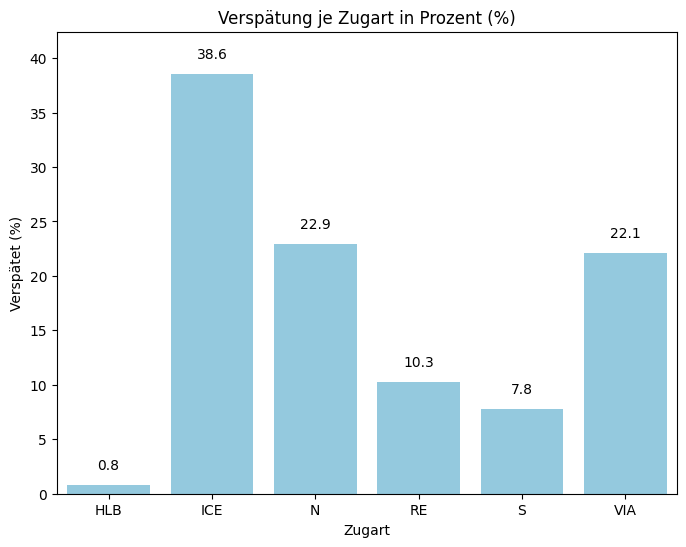

In [ ]:
file_path = "out/Result_41.csv"

print_avarage_delay_percentage(file_path, title='Verspätung je Zugart in Prozent (%)', x_axis_label='Zugart', y_axis_label='Verspätet (%)')

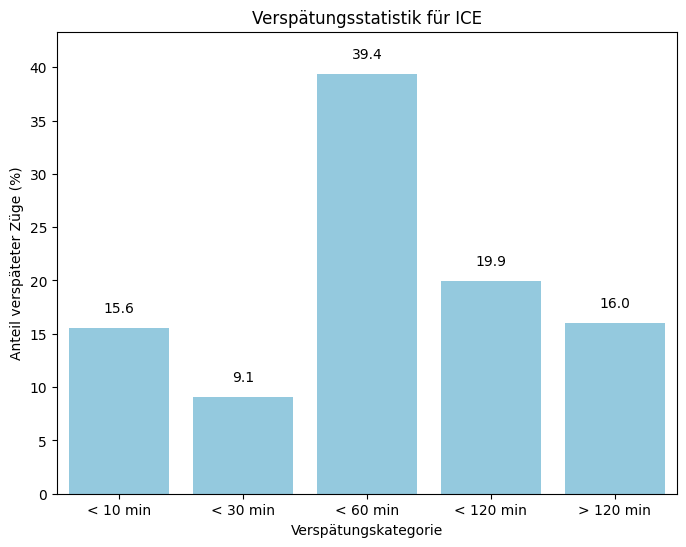

In [ ]:
file_path = "out/Result_41.csv"
train_type_shortcut = "ICE"

title = train_type_shortcut
if train_type_shortcut == "S":
    title = "S-Bahn"

print_delay_categorie_percentage(file_path, train_type_shortcut, 
                                 title=f"Verspätungsstatistik für {title}", 
                                 x_axis_label="Verspätungskategorie", 
                                 y_axis_label="Anteil verspäteter Züge (%)",
                                 exclude_zeros=False)

# Kapitel: Finale

Daten von CSV in Data Frame extrahieren

In [280]:
import pandas as pd

def load_csv_as_data_x(file_path):
    """
    Lädt eine CSV-Datei und gibt sie als DataFrame zurück.
    Die relevanten Spaltennamen werden generalisiert:
      - 'plannedArrival' oder 'plannedDeparture' -> 'planned'
      - 'changedArrivalTime' oder 'changedDepartureTime' -> 'changed'
      - 'arrival_delay' oder 'departure_delay' -> 'delay'
    Zusätzlich werden alle negativen 'delay'-Werte auf 0 gesetzt.

    :param file_path: Der Pfad zur CSV-Datei, die geladen werden soll.
    :return: DataFrame mit generalisierten Spaltennamen und angepassten Werten.
    """
    try:
        # CSV-Datei einlesen, unter der Annahme, dass die Spalten durch Semikolon getrennt sind
        df = pd.read_csv(file_path, sep=";", header=0)
        
        # Spaltenumbenennung basierend auf gemeinsamer Bedeutung
        rename_mapping = {
            'plannedArrival': 'planned',
            'plannedDeparture': 'planned',
            'changedArrivalTime': 'changed',
            'changedDepartureTime': 'changed',
            'arrival_delay': 'delay',
            'departure_delay': 'delay'
        }
        
        # Nur Spalten umbenennen, die tatsächlich in der CSV vorhanden sind
        df.rename(columns={col: rename_mapping[col] for col in df.columns if col in rename_mapping}, inplace=True)
        
        # Falls die generalisierte Spalte 'delay' existiert, negative Werte auf 0 setzen
        if 'delay' in df.columns:
            df['delay'] = df['delay'].apply(lambda x: max(x, 0))
    
    except FileNotFoundError:
        raise ValueError(f"Die Datei unter dem Pfad {file_path} wurde nicht gefunden.")
    except pd.errors.EmptyDataError:
        raise ValueError("Die CSV-Datei ist leer.")
    except Exception as e:
        raise ValueError(f"Fehler beim Einlesen der Datei: {e}")
    
    return df


Filtert die Daten entsprechend auf Wunsch nach Bahnhof, Datum oder Woche

In [281]:
def filter_data_x(data, evas=None, date=None, week_number=None):
    """
    Filtert die Daten basierend auf den gegebenen Parametern.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param evas: Liste von EVA-Nummern der Bahnhöfe, nach denen gefiltert werden soll (Optional).
    :param date: Das Datum, nach dem gefiltert werden soll (Optional, im Format 'YYYY-MM-DD').
    :param week_number: Die Kalenderwoche, nach der gefiltert werden soll (Optional).
    :return: Gefilterte Daten, die an die jeweilige Berechnungsfunktion übergeben werden können.
    """
    
    # Überprüfen, ob die Daten vorhanden sind
    if data.empty:
        print("Es sind keine Daten vorhanden.")
        return None
    
    # Stelle sicher, dass die EVA-Spalte als String behandelt wird
    data['eva'] = data['eva'].astype(str)
    
    # Wenn evas nicht spezifiziert, berücksichtige alle
    if evas is not None:
        # Falls nur ein einzelner Wert übergeben wurde, konvertiere ihn in eine Liste
        if isinstance(evas, str):
            evas = [evas]
        
        # Falls die übergebenen EVAs nicht in den Daten sind, gib eine Warnung aus
        if not set(evas).issubset(data['eva'].values):
            print(f"Es gibt keine Bahnhöfe mit den EVA-Nummern {evas}.")
            return None
        # Filtere nach den angegebenen EVA-Nummern
        data = data[data['eva'].isin(evas)]
    
    # Wenn ein Datum angegeben ist, nach Jahr, Monat und Tag filtern
    if date:
        data['date'] = pd.to_datetime(data['planned']).dt.date
        data = data[data['date'] == pd.to_datetime(date).date()]
    
    # Wenn eine Kalenderwoche angegeben ist, nach dieser filtern
    if week_number:
        if date:
            print("Tag und Kalenderwoche können nicht gleichzeitig ausgewählt werden.")
            return None
        data['week_number'] = pd.to_datetime(data['planned']).dt.isocalendar().week
        data = data[data['week_number'] == week_number]
    
    return data


Erstellt den Graph zu den Daten

In [282]:
def plot_bar_chart_by_category_and_station_x(data, x_column='X', y_column='Y', 
                                           hue_column='station', title='', 
                                           x_axis_label='Zugkategorie', y_axis_label='Verspätungsprozentsatz', 
                                           palette='Set2', y_limit_factor=1.1, text_offset_factor=0.03, 
                                           show_values=True, fig_size_x=17, fig_size_y=8, int_value=True):
    """
    Erstellt ein Balkendiagramm, das für jede Zugart (x-Achse) Balken für jeden Bahnhof anzeigt.
    
    :param data: DataFrame mit den Daten für das Diagramm.
    :param x_column: Name der Spalte für die x-Achse (z. B. Zugkategorien).
    :param y_column: Name der Spalte für die y-Achse (z. B. Verspätungsprozentsatz).
    :param hue_column: Name der Spalte für die Farbcodierung (z. B. Bahnhöfe).
    :param title: Titel des Diagramms.
    :param x_axis_label: Bezeichnung der x-Achse.
    :param y_axis_label: Bezeichnung der y-Achse.
    :param palette: Farbpalette für die Balken (Standard: 'Set2').
    :param y_limit_factor: Faktor für die Y-Achsen-Limit (Standard: 1.1).
    :param text_offset_factor: Faktor zur Berechnung des Abstands für die Textanzeige (Standard: 0.03).
    :param show_values: Boolean, ob die Werte über den Balken angezeigt werden sollen (Standard: True).
    :param int_value: Boolean, ob die Zahlen über den Balken als int oder double angezeigt werden (Standardwert: True)
    """
    # Maximalwert für die Y-Achse berechnen
    y_limit = data[y_column].max() * y_limit_factor
    
    # Balkendiagramm erstellen
    plt.figure(figsize=(fig_size_x, fig_size_y))
    ax = sns.barplot(x=x_column, y=y_column, hue=hue_column, data=data, palette=palette)
    
    # Titel und Achsenbeschriftungen setzen
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    
    # Werte über den Balken anzeigen
    if show_values:
        for bar in ax.patches:
            yval = bar.get_height()
            if yval > 0:  # Nur Werte > 0 anzeigen
                if int_value:
                    yval = int(yval)  # Ganze Zahl, wenn int_value True
                else:
                    yval = round(yval, 1)  # Eine Nachkommastelle, wenn int_value False

                plt.text(
                    bar.get_x() + bar.get_width() / 2, 
                    yval + text_offset_factor, 
                    f"{yval}",  # Anzeige des Werts
                    ha='center', 
                    va='bottom'
                )


    
    # Y-Achse anpassen
    plt.ylim(0, y_limit)
    
    plt.legend(title='Bahnhof')
    plt.tight_layout()
    plt.show()

Berechnet je Zugart wie viel Prozent der Züge verpätet sind. Bezieht nur Züge mit ein, deren Verstpätung höher als `delay_threshold`sind.

In [285]:
def calculate_percentage_delay_by_category_and_station_x(data, delay_threshold=0):
    """
    Berechnet den Prozentsatz der verspäteten Züge je Zugart und je Bahnhof sowie einen Durchschnittsbalken.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Schwellenwert für die Verspätung in Minuten.
    :return: DataFrame mit den Spalten: X (Zugkategorie), Y (Verspätungsprozentsatz) und station (Bahnhof).
    """
    # Züge filtern, die mehr als 'delay_threshold' Minuten Verspätung haben
    delayed_trains = data[data['delay'] > delay_threshold]
    
    # Berechnung: Gesamtanzahl Züge und verspätete Züge je Zugkategorie und Bahnhof
    total_trains = data.groupby(['trainCategory', 'station']).size()
    delayed_trains_by_category = delayed_trains.groupby(['trainCategory', 'station']).size()
    
    # Prozentsatz der verspäteten Züge je Zugkategorie und Bahnhof
    percentage_delay = (delayed_trains_by_category / total_trains) * 100
    
    # DataFrame mit den Ergebnissen
    result = percentage_delay.reset_index(name='delayPercentage')
    
    # Umbenennen der Spalten für das gewünschte Format
    result = result.rename(columns={'trainCategory': 'X', 'delayPercentage': 'Y'})
    
    # NaN-Werte durch 0 ersetzen und auf 2 Dezimalstellen runden
    result['Y'] = result['Y'].fillna(0).apply(lambda x: int(x * 100) / 100)  # NaN durch 0 ersetzen und abschneiden
    
    return result

Berechnet die durchschnittliche Verspätung je Zugart in Minuten. Bezieht nur Züge mit ein, deren Verspätung höher als `delay_threshold` sind

In [287]:
def calculate_average_min_delay_by_category_and_station_x(data, delay_threshold=0):
    """
    Berechnet die durchschnittliche Verspätung in Minuten pro Zugart und Bahnhof.
    
    :param data: DataFrame mit den zugrunde liegenden Daten.
    :param delay_threshold: Minimaler Schwellenwert für die Verspätung (in Minuten), um in die Berechnung einbezogen zu werden.
    :return: DataFrame mit den Spalten 'X' (Zugart), 'Y' (Durchschnittliche Verspätung in Minuten) und 'station' (Bahnhof).
    """
    if data.empty:
        print("Keine Daten für die Berechnung der Verspätung vorhanden.")
        return None

    # Nur Züge mit einer Verspätung größer als der Schwellenwert berücksichtigen
    delayed_data = data[data['delay'] > delay_threshold]
    
    if delayed_data.empty:
        print(f"Keine Züge mit einer Verspätung größer als {delay_threshold} Minuten gefunden.")
        return None
    
    # Durchschnittliche Verspätung pro Zugart und Bahnhof berechnen
    avg_delay_by_category_station = delayed_data.groupby(['trainCategory', 'station'])['delay'].mean().reset_index()
    
    # Ergebnis formatieren
    result = avg_delay_by_category_station[['trainCategory', 'station', 'delay']]
    result = result.rename(columns={'trainCategory': 'X', 'delay': 'Y'})

    # Runden der durchschnittlichen Verspätung
    result['Y'] = result['Y'].round(1)
    
    return result

Berechnet wie viel Prozent der Verspäteten Züge in eine Bestimmte Verspätungskategorie fallen.

In [286]:
def calculate_delay_statistics_by_train_type_and_station_x(data, train_type=None):
    """
    Berechnet die Statistik der Verspätungen für eine bestimmte Zugart oder für alle Züge,
    wenn keine Zugart angegeben ist, aus einem bereits gefilterten DataFrame.
    
    :param data: DataFrame, das die bereits gefilterten Daten enthält.
    :param train_type: Die Zugart, für die die Statistik berechnet werden soll. Wenn None, wird für alle Zugarten berechnet.
    :return: DataFrame mit den Verspätungskategorien (X) und deren prozentualem Anteil (Y) sowie der Stationen-Spalte.
    """
    # Wenn eine Zugart angegeben ist, nur diese berücksichtigen
    if train_type:
        data = data[data['trainCategory'] == train_type]
    
    # Überprüfen, ob es nach der Filterung noch Daten gibt
    if data.empty:
        print(f"Keine Daten für die Zugart '{train_type}' gefunden." if train_type else "Keine Daten gefunden.")
        return None
    
    # Filtere auf Züge mit einer positiven Verspätung
    df_delayed = data[data['delay'] > 0]
    
    # Überprüfen, ob es verspätete Züge gibt
    if df_delayed.empty:
        print(f"Es gibt keine verspäteten Züge.")
        return None

    # Gesamtanzahl der verspäteten Züge
    total_delays = len(df_delayed)
    
    # Berechnung des prozentualen Anteils in jeder Kategorie und nach Station
    delay_stats = []
    for station in df_delayed['station'].unique():  # Gruppiert nach Station
        station_data = df_delayed[df_delayed['station'] == station]
        
        stats = {
            'station': station,
            '< 10 min': (station_data['delay'] < 10).sum() / len(station_data) * 100,
            '< 30 min': ((station_data['delay'] >= 10) & (station_data['delay'] < 30)).sum() / len(station_data) * 100,
            '< 60 min': ((station_data['delay'] >= 30) & (station_data['delay'] < 60)).sum() / len(station_data) * 100,
            '< 120 min': ((station_data['delay'] >= 60) & (station_data['delay'] < 120)).sum() / len(station_data) * 100,
            '> 120 min': (station_data['delay'] >= 120).sum() / len(station_data) * 100
        }
        delay_stats.append(stats)

    # Umwandlung der Statistik in einen DataFrame
    stats_df = pd.DataFrame(delay_stats)
    
    # Reshape für die Darstellung der Kategorien in der Spalte 'X'
    stats_df = pd.melt(stats_df, id_vars=['station'], var_name='X', value_name='Y')

    # Optional: Y-Werte runden
    stats_df['Y'] = stats_df['Y'].apply(lambda x: round(x, 1))

    return stats_df


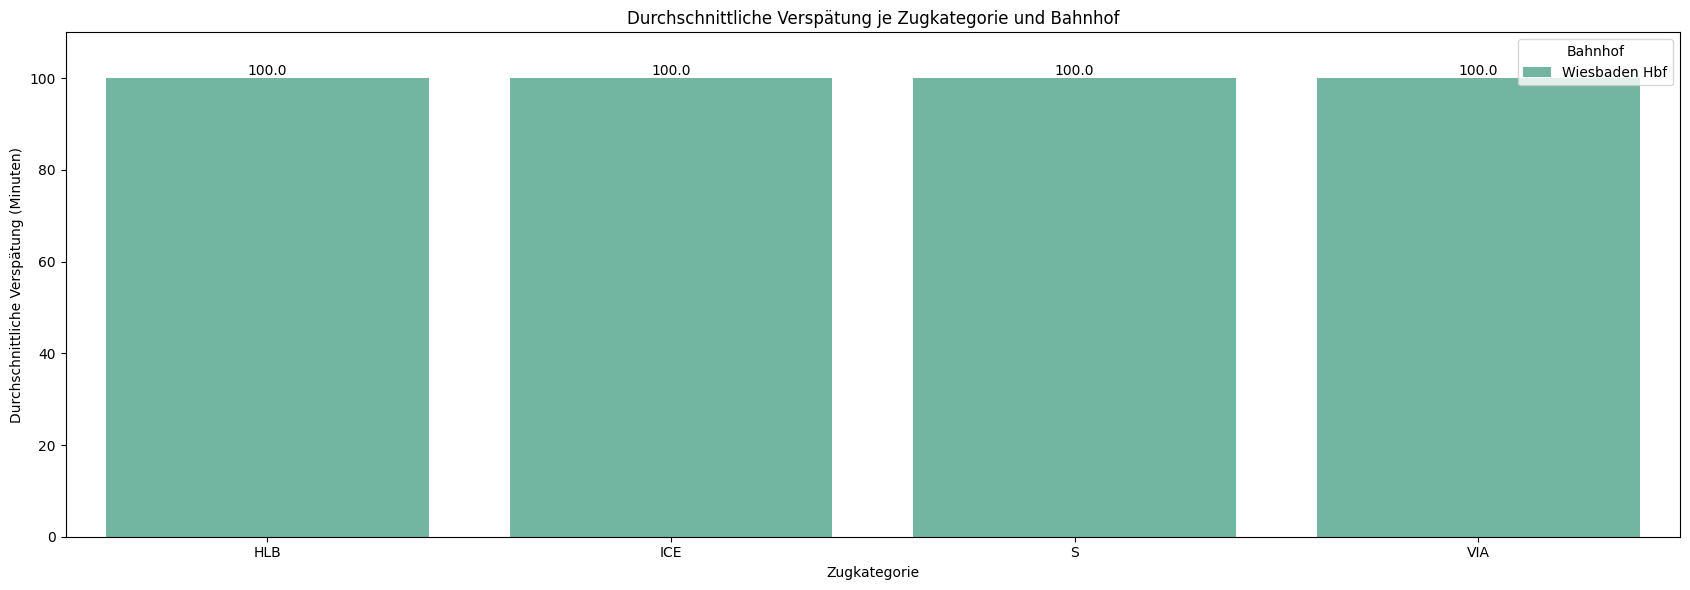

In [ ]:
# 1. CSV-Daten laden
data = load_csv_as_data_x('sql/csv/dp-superquery.csv')

# 2. Daten filtern (optional)
filtered_data = filter_data_x(
    data=data,
    evas="8000250",          # Bahnhof nach EVA-Nummer (Optional, None wenn nicht benötigt, z.B. 8000250 oder 8000134)
    date=None,         # Datum im Format 'YYYY-MM-DD' (Optional, None wenn nicht benötigt)
    week_number=None   # Kalenderwoche (Optional, None wenn nicht benötigt)
)

delay_threshold = 10
# 3. Durchschnittliche Verspätung in Minuten nach Zugart und Bahnhof berechnen
average_min_delay_data = calculate_average_min_delay_by_category_and_station_x(
    data=filtered_data,
    delay_threshold=delay_threshold  # Schwellenwert in Minuten
)

# 3. Prozentuale Verspätungen nach Zugart und Bahnhof berechnen
percentage_delay_data = calculate_percentage_delay_by_category_and_station_x(
    data=filtered_data,
    delay_threshold=delay_threshold  # Schwellenwert in Minuten
)

# 3. Verspätungsstatistik für eine Zugart berechnen
train_delay_data = calculate_delay_statistics_by_train_type_and_station_x(
    data=filtered_data,
    train_type="ICE"      # Zugart (optional)
)

plot_data = percentage_delay_data
# 4. Balkendiagramm erstellen
if plot_data is not None:
    plot_bar_chart_by_category_and_station_x(
    data=plot_data,
    title='Durchschnittliche Verspätung je Zugkategorie und Bahnhof',
    x_axis_label='Zugkategorie',
    y_axis_label='Durchschnittliche Verspätung (Minuten)',
    fig_size_x=17,
    fig_size_y=6,
    int_value=False,
)
